In [48]:
from riskyneuroarousal.utils.load_data import load_behavioral_data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Visualizing the gambles for each condition

In [49]:
gains = np.arange(5, 41)
losses = np.arange(5, 21)
gains_equalIndifference = np.arange(10, 41, 2)
gains_equalRange = np.arange(5, 21, 1)
losses_both = np.arange(5, 21, 1)

In [ ]:
samples = []
condition = []
gains_plot = []
losses_plot = []
for gain in gains:
    for loss in losses:
        valueIndifference, valueRange = np.nan, np.nan
        if gain in gains_equalIndifference and loss in losses_both:
            valueIndifference += 1
        if gain in gains_equalRange and loss in losses_both:
            valueRange += 1
        
        if valueIndifference == 1 and valueRange == 1:
            valueIndifference += 1
            valueRange += 1
        if valueIndifference == 0:
            valueIndifference = np.nan
        if valueRange == 0:
            valueRange = np.nan

        gains_plot.append(gain)
        gains_plot.append(gain)
        losses_plot.append(loss)
        losses_plot.append(loss)
        samples.append(valueIndifference)
        samples.append(valueRange)
        condition.append("equalIndifference")
        condition.append("equalRange")

df = pd.DataFrame({"gain": gains_plot, "loss": losses_plot, "sampled": samples, "condition": condition})

/Users/gustxsr/Documents/Stanford/PoldrackLab/github/riskyneuroarousal/.venv/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/gustxsr/Documents/Stanford/PoldrackLab/github/riskyneuroarousal/.venv/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


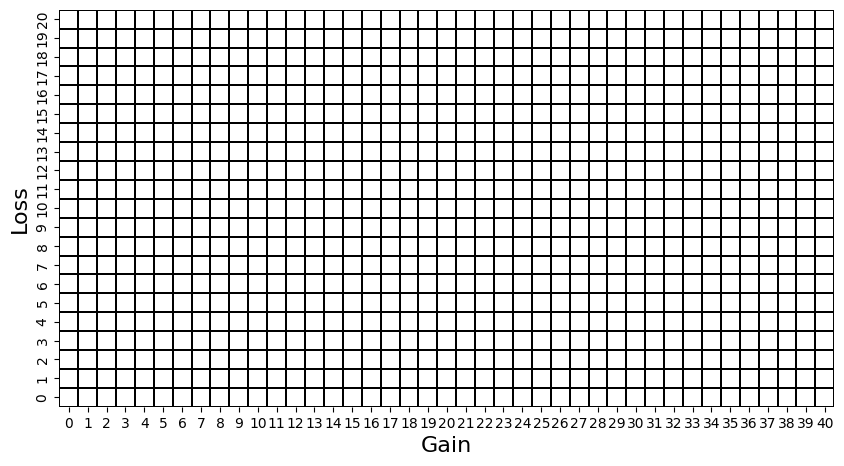

In [4]:
plt.figure(figsize=(10, 10))
hmap_data = df.query("condition == 'equalRange'").groupby(['loss', 'gain'])['sampled'].mean().unstack()
# Reverse the order of gain
hmap_data = hmap_data.iloc[::-1]
sns.heatmap(hmap_data, cmap='crest', cbar_kws={'label': 'Response Time'}, square=True, linewidths=0.2, linecolor='black', cbar = False)
plt.xlabel("Gain", fontsize=16)
plt.ylabel("Loss", fontsize=16)
# Increase font size of labels and ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [19]:
def PT_value(gain, loss, lambda_ = 1, rho = 1):
    return gain**rho - lambda_ * loss**rho

In [46]:
lambda_= 0.5
rho=2
samples = []
gains_plot = []
losses_plot = []
for gain in gains:
    for loss in losses:
        if PT_value(gain, loss, lambda_=lambda_, rho=rho) > 0:
            value = 1
        else:
            value = 0
        

        gains_plot.append(gain)
        losses_plot.append(loss)
        samples.append(value)

df = pd.DataFrame({"gain": gains_plot, "loss": losses_plot, "sampled": samples})

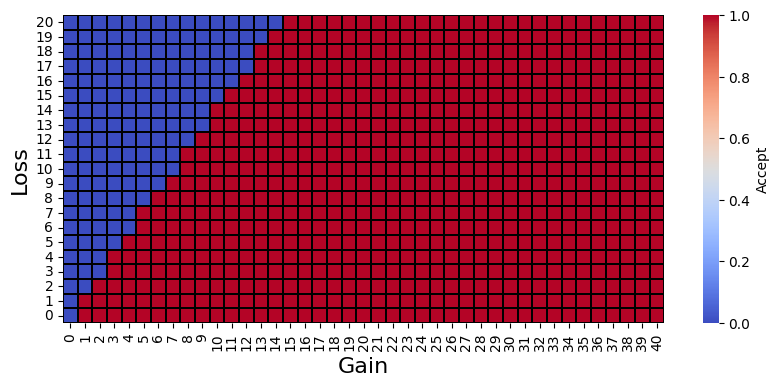

In [47]:
plt.figure(figsize=(10, 4))
hmap_data = df.groupby(['loss', 'gain'])['sampled'].mean().unstack()
# Reverse the order of gain
hmap_data = hmap_data.iloc[::-1]
sns.heatmap(hmap_data, cmap='coolwarm', cbar_kws={'label': 'Accept'}, square=True, linewidths=0.2, linecolor='black', cbar = True)
plt.xlabel("Gain", fontsize=16)
plt.ylabel("Loss", fontsize=16)
# Increase font size of labels and ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()
# Less risk seeking, more loss averse

In [62]:
samples = []
gains_plot = []
losses_plot = []
for gain in gains:
    for loss in losses:
        value = np.log(loss/gain)
        

        gains_plot.append(gain)
        losses_plot.append(loss)
        samples.append(value)

df = pd.DataFrame({"gain": gains_plot, "loss": losses_plot, "sampled": samples})

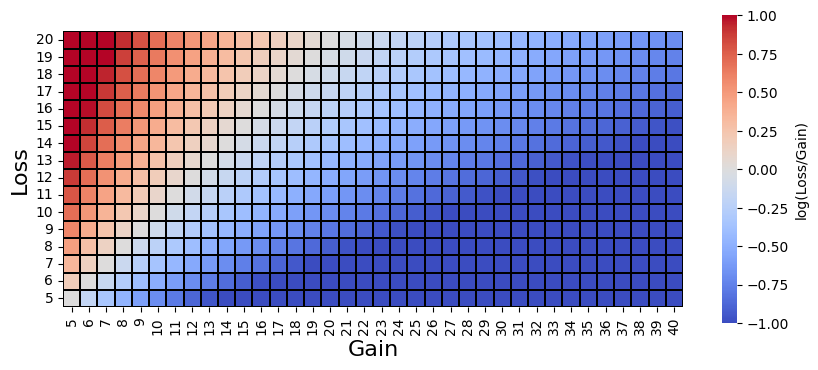

In [63]:
plt.figure(figsize=(10, 4))
hmap_data = df.groupby(['loss', 'gain'])['sampled'].mean().unstack()
# Reverse the order of gain
hmap_data = hmap_data.iloc[::-1]
ax = sns.heatmap(hmap_data, cmap='coolwarm', cbar_kws={'label': 'log(Loss/Gain)'}, square=True, linewidths=0.2, linecolor='black', cbar = True)
plt.xlabel("Gain", fontsize=16)
plt.ylabel("Loss", fontsize=16)
# Set range of cbar to -1, 1
ax.collections[0].set_clim(-1, 1)
# Increase font size of labels and ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [53]:
samples = []
gains_plot = []
losses_plot = []
for gain in gains:
    for loss in losses:
        value = np.square(np.log(loss/gain))
        

        gains_plot.append(gain)
        losses_plot.append(loss)
        samples.append(value)

df = pd.DataFrame({"gain": gains_plot, "loss": losses_plot, "sampled": samples})

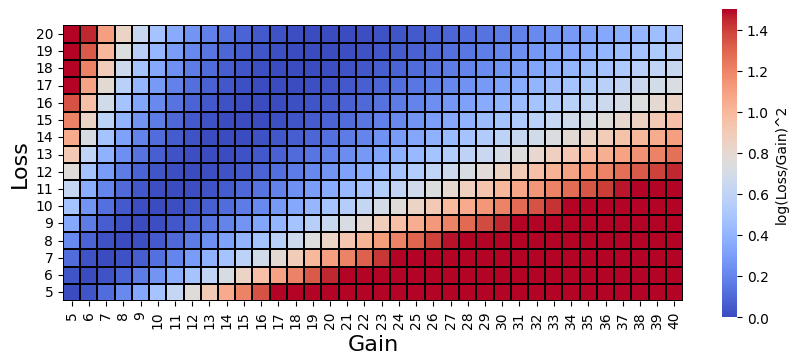

In [59]:
plt.figure(figsize=(10, 4))
hmap_data = df.groupby(['loss', 'gain'])['sampled'].mean().unstack()
# Reverse the order of gain
hmap_data = hmap_data.iloc[::-1]
ax = sns.heatmap(hmap_data, cmap='coolwarm', cbar_kws={'label': 'log(Loss/Gain)^2'}, square=True, linewidths=0.2, linecolor='black', cbar = True)
plt.xlabel("Gain", fontsize=16)
plt.ylabel("Loss", fontsize=16)
# Increase font size of labels and ticks
ax.collections[0].set_clim(0, 1.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [2]:
data = load_behavioral_data(min_RT=0.2)

In [3]:
# For each subject, we will compute the max gain they have seen from a trial
data["cumulative_max_gain"] = data.groupby("sub")["gain"].cummax()
data["cumulative_max_loss"] = data.groupby("sub")["loss"].cummax()

<Axes: xlabel='trial', ylabel='cumulative_max_loss'>

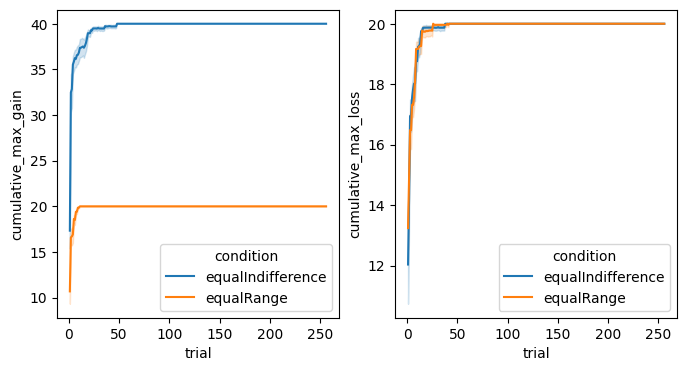

In [5]:
# Two columns for figures
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.lineplot(data, x="trial", y="cumulative_max_gain", hue="condition", ax=axs[0])
sns.lineplot(data, x="trial", y="cumulative_max_loss", hue="condition", ax=axs[1])